In [ ]:
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing Dataset and Train and Test data

In [ ]:
x_train = []
y_train = [0]*200 + [1]*200
y_train = np.array(y_train)
label_list = ['Mango','Peach']
y_train = to_categorical(y_train,2)

#=======================train data=====================================

inputshape  = (299,299)
path = r'/content/drive/MyDrive/Fruit_data_set/Train/Mango'
for file in os.listdir(path):
  filename = os.path.join(path,file)
  myimg = image.load_img(filename,target_size = inputshape)
  myimg = image.img_to_array(myimg)
  myimg = np.expand_dims(myimg , axis = 0)
  myimg = preprocess_input(myimg)
  x_train.append(myimg)

inputshape  = (299,299)
path = r'/content/drive/MyDrive/Fruit_data_set/Train/Peach'
for file in os.listdir(path):
  filename = os.path.join(path,file)
  myimg = image.load_img(filename,target_size = inputshape)
  myimg = image.img_to_array(myimg)
  myimg = np.expand_dims(myimg , axis = 0)
  myimg = preprocess_input(myimg)
  x_train.append(myimg)

x_train = np.array(x_train)
x_train.shape
x_train = x_train.reshape(400,299,299,3)

#=======================test data=====================================
x_test = []
y_test = []
inputshape  = (299,299)
path = r'/content/drive/MyDrive/Fruit_data_set/Test/Mango'
for file in os.listdir(path):
  filename = os.path.join(path,file)
  myimg = image.load_img(filename,target_size = inputshape)
  myimg = image.img_to_array(myimg)
  myimg = np.expand_dims(myimg , axis = 0)
  myimg = preprocess_input(myimg)
  x_test.append(myimg)

path = r'/content/drive/MyDrive/Fruit_data_set/Test/Peach'
for file in os.listdir(path):
  filename = os.path.join(path,file)
  myimg = image.load_img(filename,target_size = inputshape)
  myimg = image.img_to_array(myimg)
  myimg = np.expand_dims(myimg , axis = 0)
  myimg = preprocess_input(myimg)
  x_test.append(myimg)

y_test = 100*[0] + 100*[1]
y_test = np.array(y_test)
y_test = to_categorical(y_test,2)

x_test = np.array(x_test)
x_test.shape
x_test = x_test.reshape(200,299,299,3)

Importing InceptionV3 and building the new model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x) #number of classes = 2

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:#Freezeing the layers
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics = ['acc'])

#training the model with the new dataset
opt = SGD(lr = 0.0001 , momentum = 0.9)
hist = model.fit(x_train,y_train,validation_split = 0.2,epochs = 5 ,batch_size=10)


87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/5
32/32 [==============================] - 3s 89ms/step - loss: 0.5210 - acc: 0.9344 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 2/5
32/32 [==============================] - 2s 57ms/step - loss: 5.8853e-04 - acc: 1.0000 - val_loss: 4.1624e-04 - val_acc: 1.0000
Epoch 3/5
32/32 [==============================] - 2s 57ms/step - loss: 1.9576e-04 - acc: 1.0000 - val_loss: 1.2589e-05 - val_acc: 1.0000
Epoch 4/5
32/32 [==============================] - 2s 57ms/step - loss: 1.4386e-05 - acc: 1.0000 - val_loss: 7.1418e-06 - val_acc: 1.0000
Epoch 5/5
32/32 [==============================] - 2s 57ms/step - loss: 4.4061e-06 - acc: 1.0000 - val_loss: 2.7477e-06 - val_acc: 1.0000


Plotting results and evaluating

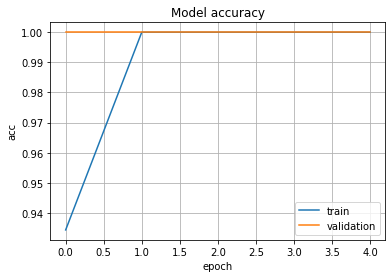

In [ ]:

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.grid()
plt.title("Model accuracy")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train','validation'],loc='lower right')

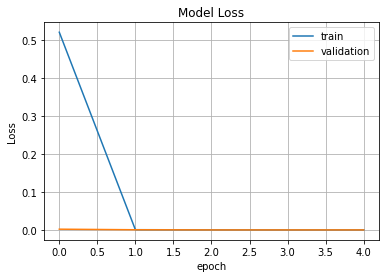

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 160ms/step - loss: 5.7076e-05 - acc: 1.0000


[5.7076187658822164e-05, 1.0]